# ANALYSE DES CORRELATIONS

Afin de reduire la dimensionnalite de notre dataframe, on va etudier plusieurs points :
1. La correlation des features a la TARGET. Des features trop correlees peuvent etre caracteristiques d'un data leakage, tandis que des features trop peu correlees peuvent ne pas etre necessaires.
2. La correlations entre les features, car on souhaite disposer de variables independantes. Par ailleurs, la presence de variables tres correlees a presence a biaiser les modeles type Random Forest.

In [1]:
import pandas as pd
import  mbr_kernel as mkn
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_classif

# Modules perso
import outils_feature_engineering_810 as fe810

TEST_SIZE = 0.2
RANDOM_STATE = 42
GIT_FOLDER = './'
INPUT_FOLDER = GIT_FOLDER + 'input_data/'
DOSSIER_IMG = GIT_FOLDER+'temp_img/'


In [2]:
def transform_X(X):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    scaler = StandardScaler()
    X_imp = imputer.fit_transform(X)
    X_sc = scaler.fit_transform(X_imp)
    new_X=pd.DataFrame(X_sc, columns=X.columns.tolist())
    return  new_X

# 1. Data preprocessing

In [3]:
df_train = pd.read_csv('./input_data/application_train.csv')
df = mkn.full_feature_engineering(df_input = df_train, df_folder=INPUT_FOLDER)

Forme initiale du Dataframe :  (307511, 122)


/home/maximorose/git_repositories/cln_oc_p07/outils_feature_engineering_810.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df.drop(columns=['taux_nan'], inplace=True)
/home/maximorose/git_repositories/cln_oc_p07/mbr_kernel.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
/home/maximorose/git_repositories/cln_oc_p07/mbr_kernel.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Forme du Dataframe apres traitement :  (219656, 122)

Application dataframe shape:  (219656, 17)
application processing - done in 1s
Forme initiale du Dataframe :  (1716428, 17)
Forme du Dataframe apres traitement :  (1716428, 17)
Bureau dataframe shape:  (305811, 8)
Bureau and bureau_balance processing - done in 8s
Forme initiale du Dataframe :  (1670214, 37)


/home/maximorose/git_repositories/cln_oc_p07/outils_feature_engineering_810.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df.drop(columns=['taux_nan'], inplace=True)


Forme du Dataframe apres traitement :  (1234578, 37)
Forme initiale du Dataframe :  (13605401, 8)
Forme du Dataframe apres traitement :  (13605401, 8)
Previous Application dataframe shape:  (338308, 12)
Previous application processing - done in 24s
Pos-Cash dataframe shape:  (337252, 3)
Pos-Cash processing - done in 5s
Installement dataframe shape:  (339587, 7)
Installment processing - done in 15s
CC dataframe shape:  (103558, 6)
CC processing - done in 7s


In [4]:
X = df.drop(columns = ['SK_ID_CURR', 'TARGET'])
y = df['TARGET']
Xt = transform_X(X)

# 1. Etude correlation to target
## 1.1. Using f_classif
"Intuitively, it is the ratio of (variance in output feature(y) explained by input feature(X) and variance in output feature(y) not explained by input feature(X))."

More info :
- [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)
- [stack exchange](https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w)

In [5]:
bestfeatures = SelectKBest(f_classif, k=Xt.shape[1])
fit = bestfeatures.fit(Xt,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                          Specs        Score
8                  EXT_SOURCE_3  5786.883295
7                  EXT_SOURCE_2  5202.561997
6                  EXT_SOURCE_1  2720.374075
15        BURO_DAYS_CREDIT_MEAN  1446.144079
1                    DAYS_BIRTH  1131.801448
48            CC_LIMIT_USE_MEAN  1108.324727
10        CREDIT_TO_GOODS_RATIO  1027.591502
2                 DAYS_EMPLOYED   859.751649
20          BURO_HAS_CREDIT_SUM   826.477638
29  PREV_HAD_LATE_PAYMENTS_MEAN   814.390437


/home/maximorose/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/maximorose/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [6]:
featureScores.nlargest(15,'Score')

,Specs,Score
8,EXT_SOURCE_3,5786.883295
7,EXT_SOURCE_2,5202.561997
6,EXT_SOURCE_1,2720.374075
15,BURO_DAYS_CREDIT_MEAN,1446.144079
1,DAYS_BIRTH,1131.801448
48,CC_LIMIT_USE_MEAN,1108.324727
10,CREDIT_TO_GOODS_RATIO,1027.591502
2,DAYS_EMPLOYED,859.751649
20,BURO_HAS_CREDIT_SUM,826.477638
29,PREV_HAD_LATE_PAYMENTS_MEAN,814.390437


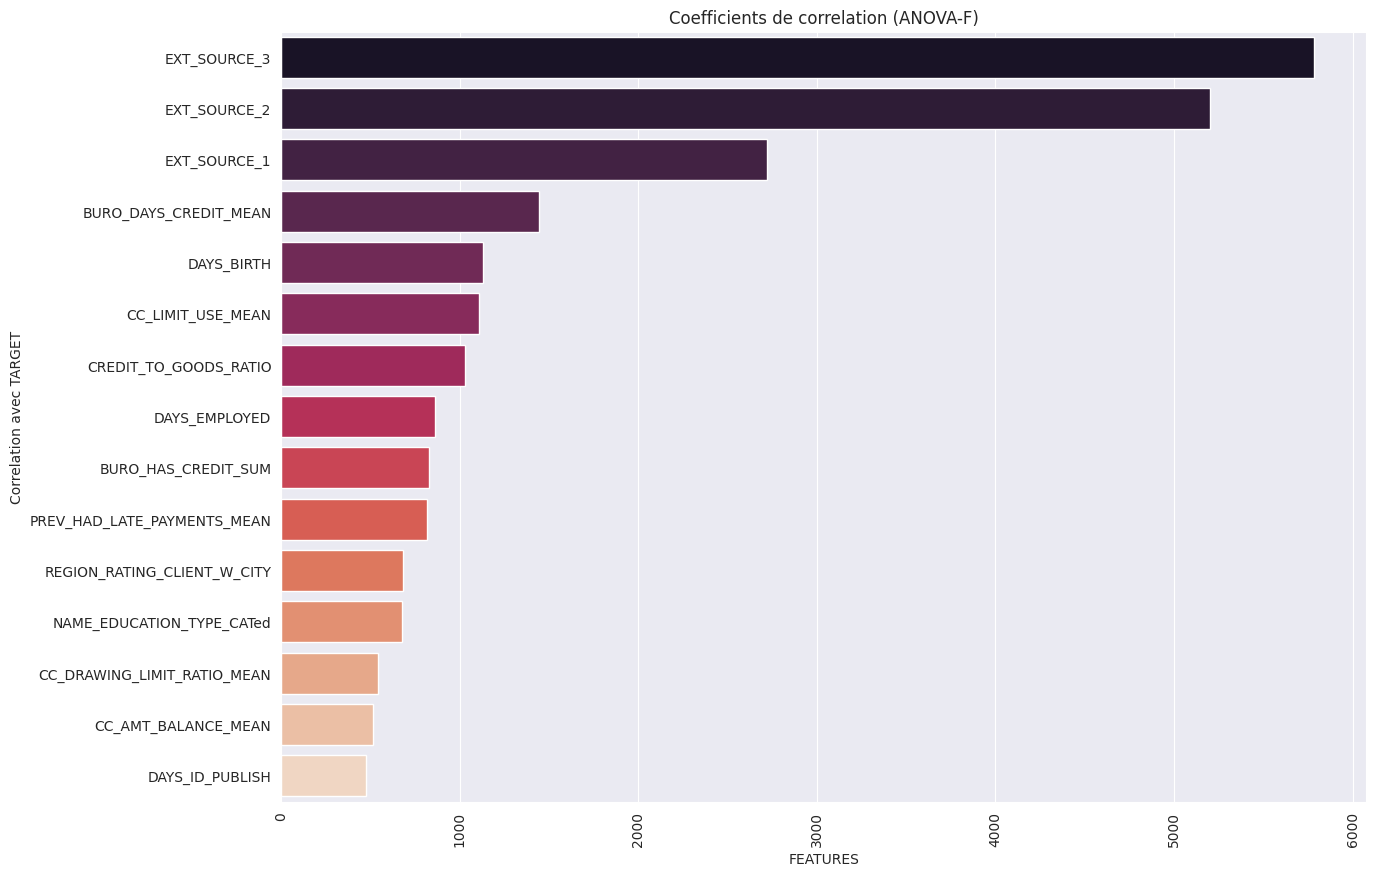

In [7]:
fe810.display_barchart_bivar_correlation(df_poids=featureScores.nlargest(15,'Score'), col_nom='Specs', col_corr='Score', coef='ANOVA-F')

## 1.2. Using Pearson's

In [8]:
top_feat_list = featureScores.nlargest(15,'Score')['Specs'].values

In [9]:
smdf = Xt
smdf['TARGET'] = y
smdf.shape

(219656, 52)

In [10]:
corrmat = smdf.corr()
abs_corrmat = np.abs(corrmat)

In [12]:
abs_corrmat.sort_values(by=['TARGET'], ascending=False)['TARGET'].head(15).reset_index()

,index,TARGET
0,TARGET,1.000000
1,EXT_SOURCE_3,0.160233
2,EXT_SOURCE_2,0.152103
3,EXT_SOURCE_1,0.110601
4,BURO_DAYS_CREDIT_MEAN,0.080868
5,DAYS_BIRTH,0.071595
6,CC_LIMIT_USE_MEAN,0.070857
7,CREDIT_TO_GOODS_RATIO,0.068254
8,DAYS_EMPLOYED,0.062434
9,BURO_HAS_CREDIT_SUM,0.061193


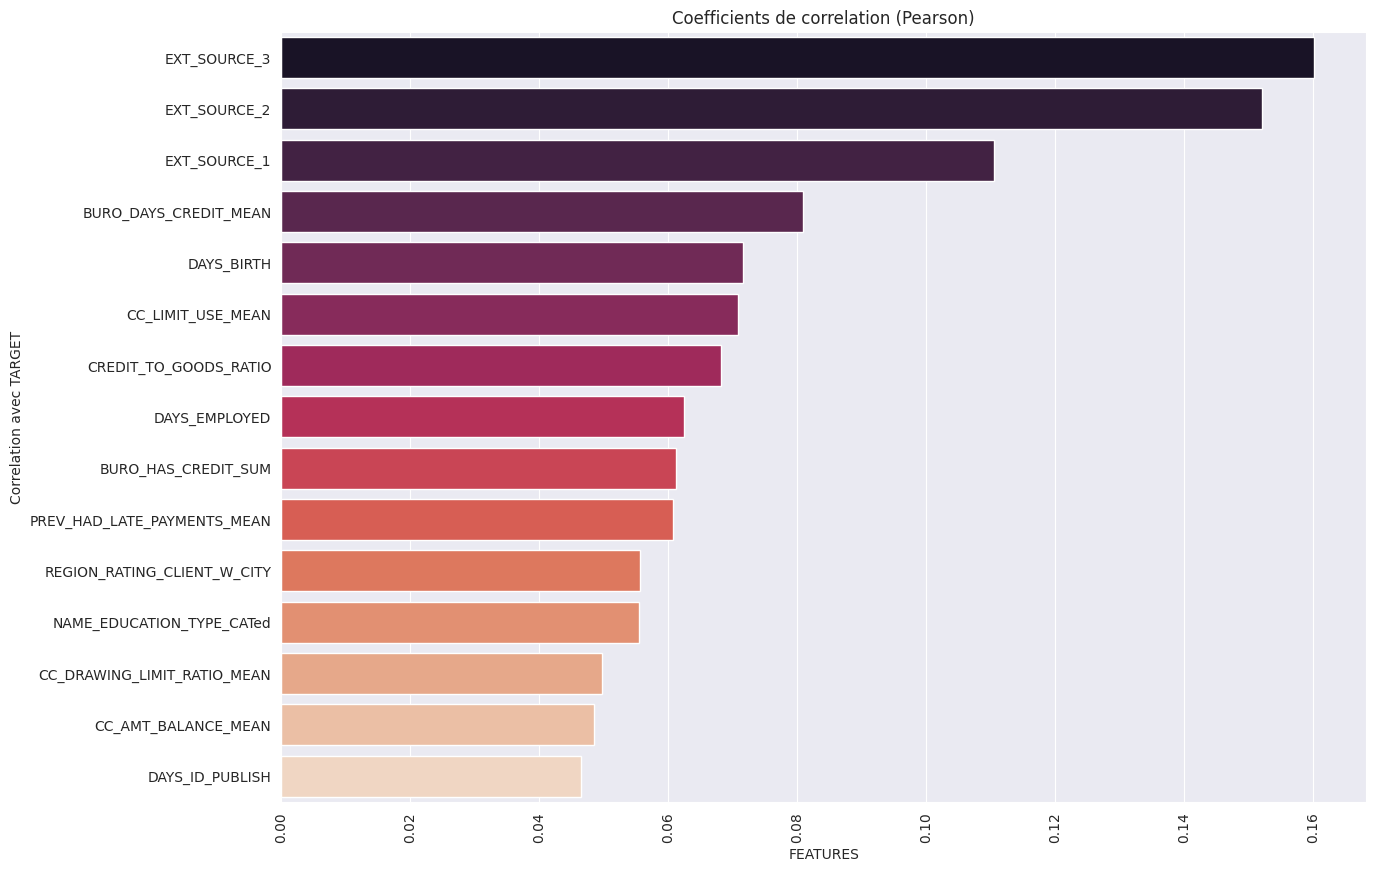

In [16]:
shortlist = abs_corrmat.sort_values(by=['TARGET'], ascending=False)['TARGET'].head(16).reset_index()
shortlist = shortlist[shortlist['index']!='TARGET']
fe810.display_barchart_bivar_correlation(df_poids=shortlist, col_nom='index', col_corr='TARGET')

## Synthese.
Les variables EXT_SOURCE_1, 2 et 3 sont tres correlees a la TARGET. Bien plus que les autres. On pourrait soupconner une data leakage. Cependant, ces features apparaissent aussi dans les donnees de production, donc elle ne peuvent etre directement liee a la TARGET.

La description des features indique "Normalized score from external data source". On pourrait imaginer que c'est un scoring issue d'un tiers partenaire. Si ce partenaire est bon dans son travail, cela justifie une grande correlation a la TARGET :).

# 2. Correlations inter-features

In [12]:
threshold = 0.7

In [13]:
globale_corr = Xt.corr()
highly_correlated = globale_corr.abs() > threshold

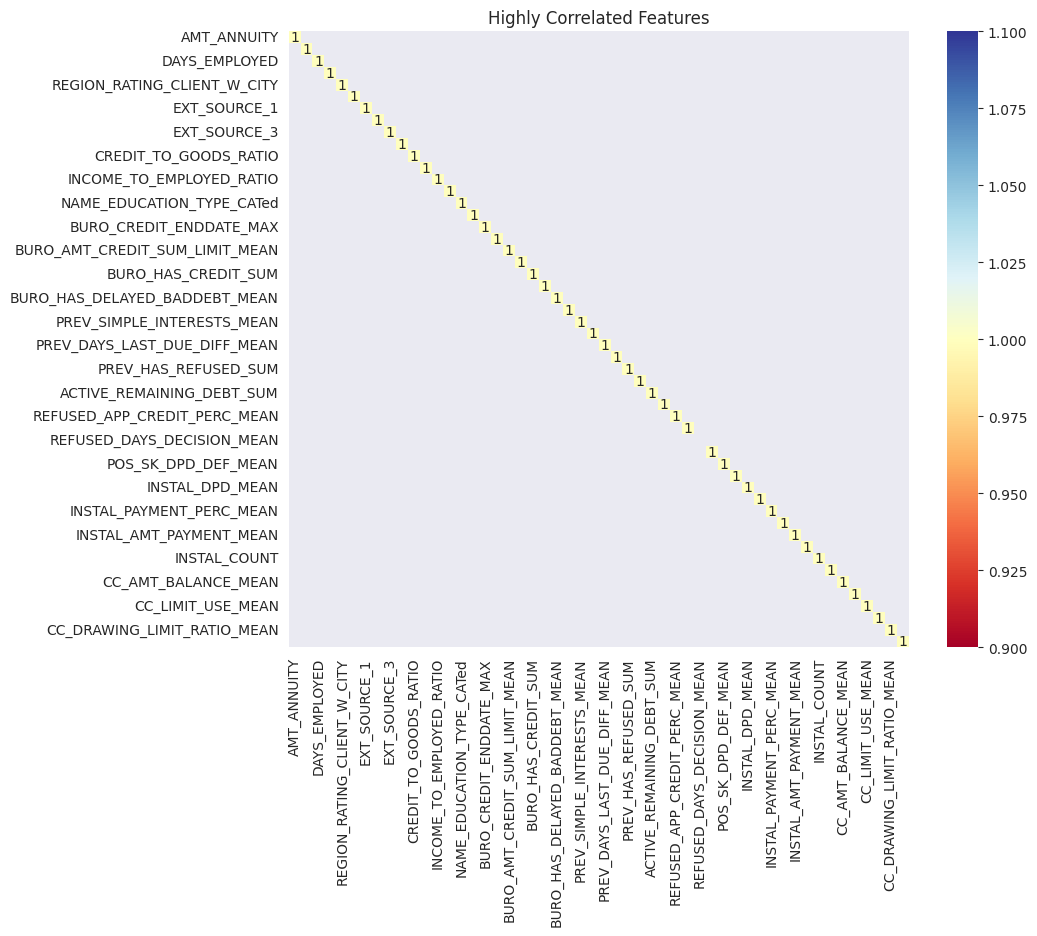

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(globale_corr[highly_correlated], annot=True, cmap="RdYlBu")
plt.title('Highly Correlated Features')
plt.show()

In [19]:
fe810.get_highly_correlated_features(Xt, threshold=0.7)

,Feature 1,Feature 2,Correlation


Pour tester laquelles des features tres correlees est la plus correlee a la TARGET :

In [16]:
# On ne va garder que l'AMT_CREDIT
featureScores[featureScores['Specs'].isin(['REFUSED_APP_CREDIT_PERC_MEAN', 'REFUSED_DAYS_DECISION_MEAN'])]

,Specs,Score
32,REFUSED_APP_CREDIT_PERC_MEAN,343.625198
34,REFUSED_DAYS_DECISION_MEAN,NaN


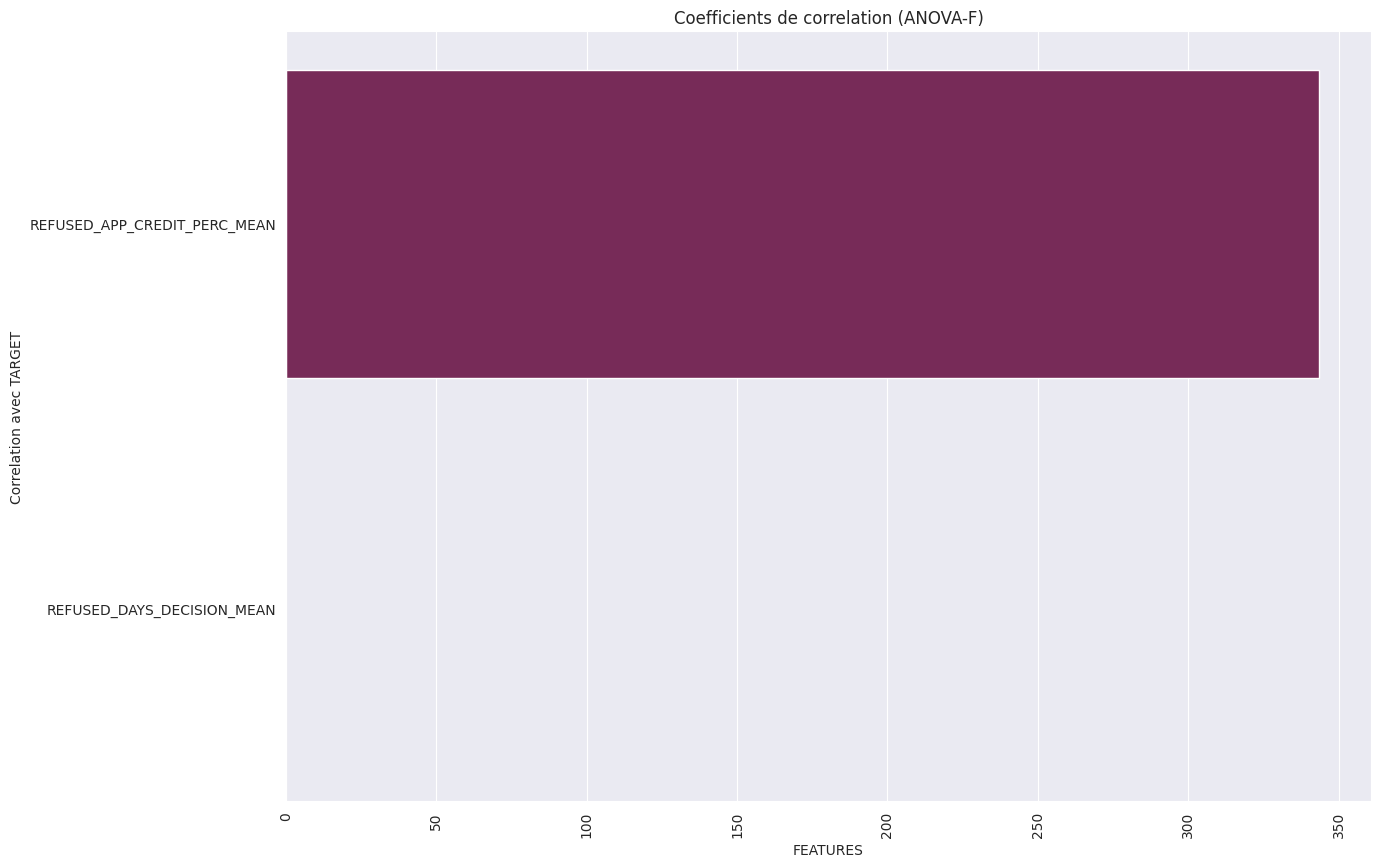

In [17]:
fe810.display_barchart_bivar_correlation(df_poids=featureScores[featureScores['Specs'].isin(['REFUSED_APP_CREDIT_PERC_MEAN', 'REFUSED_DAYS_DECISION_MEAN'])], col_nom='Specs', col_corr='Score', coef='ANOVA-F')